In [1]:
import pandas as pd
import seaborn as sb
from pandas import DataFrame as df
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt 

import os
os.environ['PATH'].split(os.pathsep)
os.environ['PATH'] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

### 1. A primeira coisa que vamos fazer é ler o conjunto de dados usando a função read_csv() dos Pandas. 
##### a. Colocaremos esses dados em um DataFrame do Pandas, chamado "dataset", e nomearemos cada uma das colunas.

In [2]:
dataset = pd.read_csv('/Users/andrerodrigues/Google Drive/FIAP-MBA 8IA/006 - Modelos de IA e ML/Trabalhos/Trabalho6/mushrooms.csv')
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 2. Pre-processamento de dados

In [3]:

def remove_features(lista_features):
    for i in lista_features:
        dataset_int.drop(i, axis=1, inplace=True)
    return 0

#### a. Como estamos construindo um modelo para classificar o cogumelo, nosso alvo será a variável "class" do dataframe dataset.
##### *Para ter certeza de que é uma variável binária, vamos usar a função countplot () do Seaborn.*

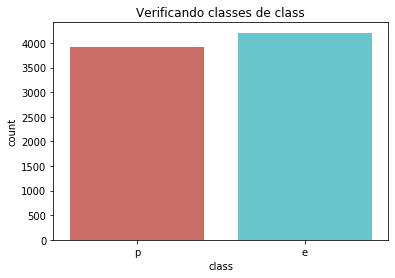

In [4]:
plot = sb.countplot(x='class',data=dataset, palette='hls')
plt.title("Verificando classes de class")
plt.show(plot)

##### Ok, agora veja que a variavel class é binária

### 3. Checking for missing values
##### *É fácil checar missing values usando método isnull() com o método sum(), o número retornado condiz com a quantidade True para o teste, ou seja, quantidade de valores nulos nas variaveis*

In [5]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [7]:
dataset.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
len(dataset.columns)

23

In [9]:
dataset.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

### 4. Ajustando os types do dataset
#### a. Vemos que o dataset foi todo construído com dtype = object. 
##### *Precisamos encontrar um modo de transformá-lo em variaveis quantitativas.Para isso vamos usar o LabelEncoder do SciKitLearn*

In [10]:
def enc_features(lista_features):
    enc = LabelEncoder()
    dataset_int = df(dataset)
    for i in lista_features:
        inteiros = enc.fit_transform(dataset[i])
        j = i + '_int'
        dataset_int[j] = inteiros
    return dataset_int

In [11]:
dataset_int = enc_features(dataset.columns)

In [12]:
dataset_int.dtypes

class                           object
cap-shape                       object
cap-surface                     object
cap-color                       object
bruises                         object
odor                            object
gill-attachment                 object
gill-spacing                    object
gill-size                       object
gill-color                      object
stalk-shape                     object
stalk-root                      object
stalk-surface-above-ring        object
stalk-surface-below-ring        object
stalk-color-above-ring          object
stalk-color-below-ring          object
veil-type                       object
veil-color                      object
ring-number                     object
ring-type                       object
spore-print-color               object
population                      object
habitat                         object
class_int                        int64
cap-shape_int                    int64
cap-surface_int          

In [13]:
obj_columns = dataset_int.select_dtypes(['object']).columns
obj_columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [14]:
remove_features(obj_columns)

0

In [15]:
dataset_int.dtypes

class_int                       int64
cap-shape_int                   int64
cap-surface_int                 int64
cap-color_int                   int64
bruises_int                     int64
odor_int                        int64
gill-attachment_int             int64
gill-spacing_int                int64
gill-size_int                   int64
gill-color_int                  int64
stalk-shape_int                 int64
stalk-root_int                  int64
stalk-surface-above-ring_int    int64
stalk-surface-below-ring_int    int64
stalk-color-above-ring_int      int64
stalk-color-below-ring_int      int64
veil-type_int                   int64
veil-color_int                  int64
ring-number_int                 int64
ring-type_int                   int64
spore-print-color_int           int64
population_int                  int64
habitat_int                     int64
dtype: object

### 5. Validando independencia entre as variáveis

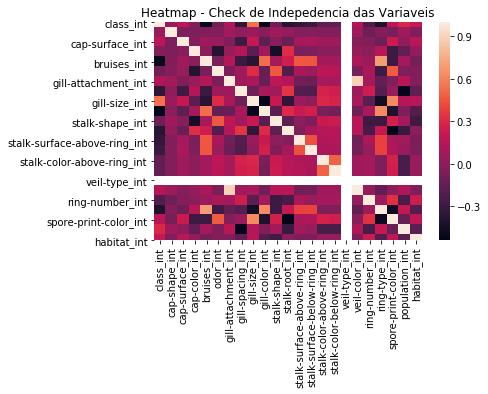

In [16]:
plot1 = sb.heatmap(dataset_int.corr()) 
plt.title("Heatmap - Check de Indepedencia das Variaveis")
plt.show(plot1)

### Vemos que a variável veil-type_int não agrega nenhuma informação e, por isso, vamos remove-la:

In [17]:
dataset_int.drop('veil-type_int', axis=1, inplace=True)
dataset_int

,class_int,cap-shape_int,cap-surface_int,cap-color_int,bruises_int,odor_int,gill-attachment_int,gill-spacing_int,gill-size_int,gill-color_int,...,stalk-surface-above-ring_int,stalk-surface-below-ring_int,stalk-color-above-ring_int,stalk-color-below-ring_int,veil-color_int,ring-number_int,ring-type_int,spore-print-color_int,population_int,habitat_int
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


#### b. Recheck do Hotmap

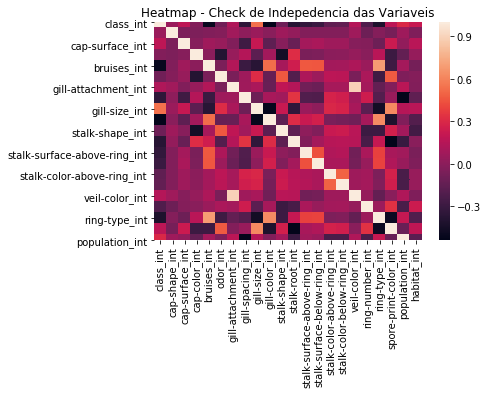

In [18]:
plot2 = sb.heatmap(dataset_int.corr()) 
plt.title("Heatmap - Check de Indepedencia das Variaveis")
plt.show(plot2)

In [19]:
corr = dataset_int.corr(method='pearson')
corr

,class_int,cap-shape_int,cap-surface_int,cap-color_int,bruises_int,odor_int,gill-attachment_int,gill-spacing_int,gill-size_int,gill-color_int,...,stalk-surface-above-ring_int,stalk-surface-below-ring_int,stalk-color-above-ring_int,stalk-color-below-ring_int,veil-color_int,ring-number_int,ring-type_int,spore-print-color_int,population_int,habitat_int
class_int,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape_int,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface_int,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color_int,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises_int,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor_int,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment_int,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing_int,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size_int,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color_int,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [20]:
# excl = []
# for i in range(len(corr)):
#     for j in range(len(corr.columns)):
#         if ((corr.iloc[i,j] >= 0.9 or corr.iloc[i,j] <= -0.9) and i != j and j!=0):
#             excl.append(j)
# np.unique(excl)

In [21]:
# dataset_int.drop(dataset_int.columns[np.unique(excl)], axis=1, inplace=True)
# dataset_int

In [22]:
# plot3 = sb.heatmap(dataset_int.corr()) 
# plt.title("Heatmap - Check de Indepedencia das Variaveis")
# plt.show(plot3)

##### *Agora temos um conjunto de dados com todas as variáveis no formato correto!*

### 6. Etapa de Treinamento do modelo

#### a. Separar o conjunto em variavel resposta e variaveis de treinamento

In [23]:
X = dataset_int.iloc[:,1:].values
y = dataset_int.iloc[:,0].values
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

Shape de X: (8124, 21)
Shape de y: (8124,)


#### b. Agora dividir em treino e teste (teste com 30%)

In [24]:
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

#### c. classificador Naive Bayes Gaussiano

In [25]:
classificador = GaussianNB()

#### d. Treinando o Modelo

In [26]:
classificador.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### e. Em caso de datasets muitos granges é possível utilizar a função partial_fit

In [27]:
#classificador.partial_fit(X_train, y_train)

### 7. Gerando a Matriz de Confusão e verificando o resultado da classificacao

In [28]:
y_pred = classificador.predict(X_test)

In [29]:
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1261
           1       0.93      0.92      0.92      1177

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438

0.92616899097621


In [30]:
print("Matriz de confusão", '\n',cm)

Matriz de confusão 
 [[1178   83]
 [  97 1080]]
